# Analysis of Twitter Data

## Play with Twitter Streaming API
API stands for Application Programming Interface. It is a tool that makes the interaction with computer programs and web services easy. Many web services provides APIs to developers to interact with their services and to access data in programmatic way. For this programming experiment, we will use Twitter Streaming API to download tweets related to the 2 keywords: "**big data**", and "**data analytic**".
### Step 1: Getting Twitter API keys
In order to access Twitter Streaming API, we need to get 4 pieces of information from Twitter: *API key*, *API secret*, *Access token* and *Access token secret*. Follow the steps below to get all these 4 elements:
* Create a twitter account if you do not already have one.
* Go to https://apps.twitter.com/ and log in with your twitter credentials.
* Click "Create New App"
* Fill out the form, agree to the terms, and click "Create your Twitter application"
* In the next page, click on "API keys" tab, and copy your "API key" and "API secret".
* Scroll down and click "Create my access token", and copy your "Access token" and "Access token secret".

In [1]:
# Variables that contains the user credentials to access Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

### Step 2: Connecting to Twitter Streaming API and downloading data
We will be using a Python library called **Tweepy** to connect to Twitter Streaming API and downloading the data.

If you don't have Tweepy installed in your machine, go to this link [https://github.com/tweepy/tweepy], and follow the installation instructions.

You can also run '*pip install tweepy*' in your anaconda installed directory.

In [2]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json

#This is a basic listener that just prints received tweets to stdout.
class MyListener(StreamListener):

    def on_data(self, data):
        try:
            with open('tweets.json', 'a') as f:
                f.write(data)
                dat = json.loads(data)
                print(f">> {dat['created_at']} {dat['text']}\n")
                return True
        except BaseException as e:
            print(f"--> Error on_data: {str(e)}")
            pass
        return True

    def on_error(self, status):
        print(status)

if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    twitter_stream = Stream(auth, MyListener())

    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    twitter_stream.filter(track=['big data', 'data analytic', 'data science', '#bigdata', '#datascience', '#dataanalytic'])

>> Mon Mar 18 17:21:47 +0000 2019 RT @iamjony94: 15 Examples of How NOT to Use LinkedIn for Social Selling https://t.co/1r75nTvxzF #socialmedia #socialmediamarketing #digita…

>> Mon Mar 18 17:21:50 +0000 2019 RT @csod_FR: À l’heure du #BigData et de la myriade de données à gérer au quotidien, il est temps pour les #RH et les responsables #FormPro…

>> Mon Mar 18 17:21:54 +0000 2019 RT @quaesita: A map of #DataScience, xkcd-style!

https://t.co/To1CwQoyjS https://t.co/WZpDH4tjmZ

>> Mon Mar 18 17:21:56 +0000 2019 Big data and expanding surveillance technologies are becoming a big boon for autocratic regimes seeking to control… https://t.co/3GMxsVPF88

>> Mon Mar 18 17:21:56 +0000 2019 RT @GFradelos: Georgios Fradelos #company message Multinationals outsource your #marketresearch from  GF-ACCORD, @GFradelos,  #bigdata &amp; #A…

>> Mon Mar 18 17:21:58 +0000 2019 RT @Fisher85M: The Fields of #ArtificialIntelligence {Infographic}

#MachineLearning #NLP #DeepLearning @Fisher85M #AI #Analyt

>> Mon Mar 18 17:23:28 +0000 2019 Abuses of science through biased peer review, purchased studies &amp; political skewing of data affect following:… https://t.co/VeAuEexRaB

>> Mon Mar 18 17:23:29 +0000 2019 RT @SouthBigDataHub: 3 Weeks 'til the #SBDH19 All Hands Meeting! #Academic and #industry leaders are invited to discuss #datascience #educa…

>> Mon Mar 18 17:23:40 +0000 2019 The strange place where the worlds of Big Data, Russian Oligarchs, and CNBC all meet.  I remember @bradfitz feted i… https://t.co/xxY3wbALnV

>> Mon Mar 18 17:23:41 +0000 2019 RT @hykeadvertising: Important things to note before you develop a website 
#socialmedia #socialmediamarketing #digitalmarketing #contentma…

>> Mon Mar 18 17:23:47 +0000 2019 Big Data: A Revolution That Will Transform How We Live, Work, and Think https://t.co/dGCaOZF11h #BigData #Dataviz… https://t.co/qbC4vTHd9m

>> Mon Mar 18 17:23:49 +0000 2019 RT @RyanMLandry: How will Big Data and Machine Learning Impact Your Business in 2019? Down

>> Mon Mar 18 17:25:09 +0000 2019 bigdataweek: RT KirkDBorne: Implement a #MultiCloud #DataLake strategy, by leveraging the #EdgeLake technology:… https://t.co/eD5qtuKrXn

>> Mon Mar 18 17:25:09 +0000 2019 RT @Xbond49: Financial services businesses are unprepared for #technology #disruption https://t.co/Df3pZOsZ4q #fintech #MachineLearning #Ar…

>> Mon Mar 18 17:25:09 +0000 2019 bigdataweek: RT KirkDBorne: 40+ Techniques &amp; #Algorithms Used by #DataScientists, with links to articles for each o… https://t.co/Dc1xQgRtXQ

>> Mon Mar 18 17:25:11 +0000 2019 bigdataweek: RT KirkDBorne: Improve Your #DataLiteracy Skills and Make the Most of Data with these fabulous resourc… https://t.co/JGnnZ80dgd

>> Mon Mar 18 17:25:11 +0000 2019 bigdataweek: RT KirkDBorne: Identify churn and proactively improve customer retention using the LentiqInc #EdgeLake… https://t.co/xA5U3jAgyK

>> Mon Mar 18 17:25:12 +0000 2019 UC Berkeley Executive Education’s Data Science program online gives non-technical prof

KeyboardInterrupt: 

## Reading and Understanding the data
The data that we stored in tweets.json is in **JSON** format. JSON stands for *JavaScript Object Notation*. This format makes it easy to humans to read the data, and for machines to parse it. Below is an example for one tweet in JSON format. You can see that the tweet contains additional information in addition to the main text which in this example: "*How #BigData and CRM are Shaping Modern Marketing https:\/\/t.co\/TgUYSUp9jT https:\/\/t.co\/V54kea8cT2*".

{"created_at":"Wed Oct 26 16:32:49 +0000 2016","id":791316663312457728,"id_str":"791316663312457728","text":"How #BigData and CRM are Shaping Modern Marketing https:\/\/t.co\/TgUYSUp9jT https:\/\/t.co\/V54kea8cT2","display_text_range":[0,73],"source":"\u003ca href=\"http:\/\/www.sociallymap.com\" rel=\"nofollow\"\u003eSociallymap\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4327758735,"id_str":"4327758735","name":"Globe Trotter BI","screen_name":"GlobeTrotter_BI","location":null,"url":null,"description":"* R\u00e9seau international de consultants BI *      #Data #BusinessIntelligence #bigdata #datascientist #datamanagement","protected":false,"verified":false,"followers_count":104,"friends_count":212,"listed_count":50,"favourites_count":13,"statuses_count":318,"created_at":"Mon Nov 30 10:15:23 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"fr","contributors_enabled":false,"is_translator":false,"profile_background_color":"C0DEED","profile_background_image_url":"http:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","profile_background_image_url_https":"....","favorited":false,"retweeted":false,"possibly_sensitive":false,"filter_level":"low","lang":"en","timestamp_ms":"1477499569143"}}

For the remaining of this lab, we will be using 3 Python libraries; *json* for parsing the data, *pandas* for data manipulation, and *matplotlib* for creating charts. 

The *json* library is installed by default in Python. You should install *pandas* and *matplotlib* if you don't have them in your machine.

We will start first by uploading *json* and *pandas* using the commands below:

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt

Next we will read the data in into an array that we call tweets.

In [4]:
import sys
#specify path of JSON file, e.g., "C:\\Program Files\\Anaconda2\\tweets.json" for your local location
tweets_data_path = 'tweets.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
count = 0
for line in tweets_file:
    try:
        if (line == '\n'):      # skip empty lines
            continue
        count = count + 1
        tweet = json.loads(line)
        tweets_data.append(tweet)
        if count%100 == 0:
            sys.stdout.write('.')
        if count%7000 == 0:
            sys.stdout.write('\n')
    except Exception as e:
        print(e)
        continue
print(f"\n{count} tweets read.")

..
209 tweets read.


Next, we will structure the tweets data into a pandas *DataFrame* to simplify the data manipulation. We will start by creating an empty DataFrame called **tweets** using the following command.

In [7]:
tweets = pd.DataFrame()

Next, we will add 3 columns to the **tweets** DataFrame called *text*, *lang*, and *country*, in which *text* column  contains the tweet, *lang* column contains the language in which the tweet was written, and *country* the country from which the tweet was sent.

In [8]:
tweets['text'] = list(map(lambda tweet: tweet.get('text', None), tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet.get('lang', None), tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet.get('place') != None else None, tweets_data))

print(tweets.head())

                                                text lang country
0  What Is Big Data Architecture? - DZone Big Dat...   tl    None
1  https://t.co/K3u9swv0PF\nSpecial offer Data Sc...   en    None
2  RT @christicash11: @cold_cash2 @salesforce @Be...   en    None
3  RT @GonzalezGouveia: #Datavisualization based ...   en    None
4  RT @eKENomics: Economists make great data scie...   en    None


Next, we will create a chart describing the Top 15 countries from which the tweets were sent.

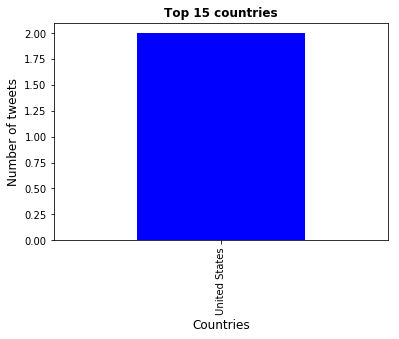

In [9]:
%matplotlib inline
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=12)
ax.set_ylabel('Number of tweets' , fontsize=12)
ax.set_title('Top 15 countries', fontsize=12, fontweight='bold')
tweets_by_country[:15].plot(ax=ax, kind='bar', color='blue')

### **YOUR TURN**
#### Problem01:
Create a chart describing the Top 15 languages in which the tweets were written.

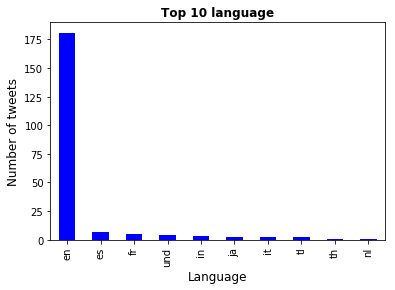

In [10]:

%matplotlib inline
tweets_by_country = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Language', fontsize=12)
ax.set_ylabel('Number of tweets' , fontsize=12)
ax.set_title('Top 10 language', fontsize=12, fontweight='bold')
tweets_by_country[:10].plot(ax=ax, kind='bar', color='blue')

In [11]:
import sys
#specify path of JSON file, e.g., "C:\\Program Files\\Anaconda2\\tweets.json" for your local location
tweets_data_path = './all_tweet.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
count = 0
for line in tweets_file:
    try:
        if (line == '\n'):      # skip empty lines
            continue
        count = count + 1
        tweet = json.loads(line)
        tweets_data.append(tweet)
        if count%100 == 0:
            sys.stdout.write('.')
        if count%7000 == 0:
            sys.stdout.write('\n')
    except Exception as e:
        print(e)
        continue
print(f"\n{count} tweets read.")

......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......

In [12]:
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet.get('text', None), tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet.get('lang', None), tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet.get('place') != None else None, tweets_data))

print(tweets.head(10))

                                                text lang country
0                             @MisterHeartz ในดีค้าบ   th    None
1                         RT @MisterHeartz: ฝัมดีจ้า   th    None
2  RT @withpeachy: เราซื้อที่ @koriico นะคะ ใครอย...   th    None
3  RT @withpeachy: — Heimish Hydrogel Eye Patch B...   th    None
4  RT @KIKI48_xx: สำหรับคนที่ถามเรื่องออกกำลังกาย...   th    None
5  RT @ausika_w: 2รูปนี้คือผ่านไปไม่ถึงครึ่งชั่วโ...   th    None
6  RT @FAIIP_92: แม่จ๋าาาาาา นึกถึงใครไม่ได้แล้ว ...   th    None
7  RT @Oneandonlyk0114: ที่ 2 มะอาววว จะเอาที่ 1 ...   th    None
8  RT @dam_dt: EXOร่วมงานกับแบรนด์ดังๆแนวหน้าระดั...   th    None
9    แงงง นุดีใจ ไม่เจอคนที่มองพี่ยูนโพผมานานแล้วววว   th    None


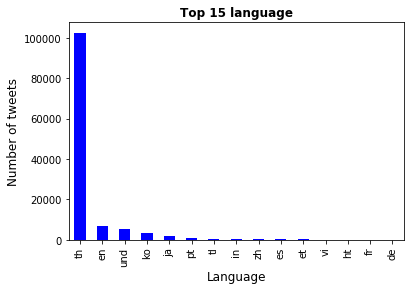

In [13]:
%matplotlib inline
tweets_by_country = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Language', fontsize=12)
ax.set_ylabel('Number of tweets' , fontsize=12)
ax.set_title('Top 15 language', fontsize=12, fontweight='bold')
tweets_by_country[:15].plot(ax=ax, kind='bar', color='blue')